# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.



## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Import Dataset

In [7]:
df = pd.read_csv('bank-additional.csv',sep=';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [9]:
#check for missing values
print(df.isnull().sum())

#encode categorical data using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

df.sample(10)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
105,45,250,1,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,0,0,0,0,0,0,1,0,0
617,49,187,1,999,0,1.1,93.994,-36.4,4.859,5191.0,...,0,0,0,0,0,0,0,1,0,0
1365,43,892,2,999,0,-1.8,92.893,-46.2,1.327,5099.1,...,0,0,0,0,1,0,0,1,0,0
2781,42,88,2,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,0,0,1,1,0,0
317,30,178,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,1,0,1,0,0
2195,31,167,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,1,0,0
3945,29,805,1,999,0,-3.0,92.713,-33.0,0.714,5023.5,...,0,0,0,0,1,0,0,1,0,1
1741,32,159,1,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,1,0,0,1,0,0
1335,54,192,1,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,0,0,0,0,1,0,1,0,0
1015,57,161,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,0,0,0,0,0,1,0,0


## Create x and y

In [10]:
x = df.drop('y_yes',axis=1)
y = df['y_yes']

In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((3295, 53), (824, 53), (3295,), (824,))

In [13]:
x_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
324,33,233,1,999,0,1.1,93.994,-36.4,4.856,5191.0,...,1,0,0,0,0,0,0,1,1,0
2350,33,92,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,0,0,1,0
1391,52,643,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,0,1,1,0
468,32,363,1,999,1,-1.8,92.893,-46.2,1.281,5099.1,...,1,0,0,0,0,0,0,1,0,0
561,39,168,2,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,60,17,13,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,0,0,0,1,0,1,0
466,41,268,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,...,0,1,0,0,0,1,0,0,1,0
3092,27,55,1,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,0,0,0,0,0,0,1,1,0
3772,34,157,5,999,0,-1.1,94.199,-37.5,0.879,4963.6,...,0,0,0,1,1,0,0,0,1,0


In [14]:
x_test

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
889,48,544,1,999,0,-1.7,94.027,-38.3,0.904,4991.6,...,0,0,0,0,0,1,0,0,1,0
2669,35,98,1,999,0,1.4,94.465,-41.8,4.958,5228.1,...,0,0,0,0,0,1,0,0,1,0
2707,56,212,1,999,1,-0.1,93.200,-42.0,4.076,5195.8,...,0,1,0,0,0,1,0,0,0,0
2258,29,247,2,999,0,-2.9,92.963,-40.8,1.260,5076.2,...,0,0,0,0,0,1,0,0,1,0
2514,62,163,2,999,0,-1.8,92.843,-50.0,1.520,5099.1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,39,328,2,6,3,-1.8,93.876,-40.0,0.683,5008.7,...,1,0,0,0,0,1,0,0,0,1
949,41,258,2,999,0,1.4,93.444,-36.1,4.970,5228.1,...,0,0,0,0,1,0,0,0,1,0
3883,47,108,1,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,0,1,0,1,0
2059,32,123,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,0,0,1,0


# Train the Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
from sklearn.metrics import classification_report , confusion_matrix

#predict on the testing set
y_pred = clf.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

In [19]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       732
           1       0.47      0.47      0.47        92

    accuracy                           0.88       824
   macro avg       0.70      0.70      0.70       824
weighted avg       0.88      0.88      0.88       824

Confusion Matrix:
[[684  48]
 [ 49  43]]


In [20]:
from sklearn.tree import plot_tree


In [21]:
#cn = class names , fn = feature names
cn = ['no','yes']
fn = x_train.columns
print(cn)
print(fn)

['no', 'yes']
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent

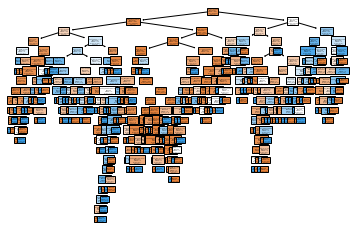

In [23]:
plot_tree(clf,feature_names=fn,class_names=cn,filled=True)
plt.show()